In [30]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [31]:
import pandas as pd
df = pd.read_csv("Data_Crypto2.csv")
df['Volume(24h)'].fillna(100, inplace=True)
df

,Symbol,Market Cap,Price,Circulating Supply,Volume(24h),% 1h,% 24h,% 7d
0,BTC,8.927062e+11,47255.660000,1.889099e+07,6.279050e+10,-0.0014,-0.1773,-0.1428
1,ETH,4.683605e+11,3949.010000,1.186021e+08,4.145664e+10,0.0027,-0.1501,-0.0499
2,BNB,9.142174e+10,548.090000,1.668012e+08,4.576646e+09,0.0021,-0.1238,-0.1013
3,USDT,7.417190e+10,1.000000,7.415765e+10,1.442001e+11,-0.0001,-0.0009,-0.0007
4,SOL,5.879423e+10,192.360000,3.056412e+08,6.513758e+09,0.0001,-0.1955,-0.0336
...,...,...,...,...,...,...,...,...
995,PING,1.407218e+07,0.005205,2.703465e+09,5.515740e+05,-0.0063,-0.1630,-0.2510
996,BIN,1.404463e+07,0.017560,8.000000e+08,1.962260e+06,0.0132,-0.2527,-0.2191
997,FEAR,1.399061e+07,2.140000,6.532157e+06,1.343316e+07,-0.0054,-0.2222,0.0025
998,AGRS,1.398430e+07,0.776900,1.800000e+07,5.813000e+03,0.0371,-0.0830,0.0620


In [32]:
#Without logging the features and target - Analysis
x = df.drop(columns = ['Price', 'Symbol'])
x = sm.add_constant(x)
y = df['Price']
#z = df[['Circulating Supply', '% 1h']]

model = sm.OLS(y, x, data = df)
crypto_model_non_log = model.fit()
crypto_model_non_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     21.37
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           6.32e-17
Time:                        22:16:24   Log-Likelihood:                -9871.4
No. Observations:                1000   AIC:                         1.975e+04
Df Residuals:                     995   BIC:                         1.978e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                433.2639    173.327      2.500      0.013      93.136     773.392
Market Cap          4.545e-08   5.42e-09      8.388      0.000    3.48e-08    5.61e-08
Circulating Supply -3.861e-13    1.6e-12     -0.241      0.809   -3.52e-12    2.75e-12
Volume(24h)        -3.769e-08   3.37e-08     -1.118      0.264   -1.04e-07    2.85e-08
% 1h                   1.6172      4.665      0.347      0.729      -7.536      10.771
% 24h                -39.8602     91.834     -0.434      0.664    -220.070     140.349
% 7d                 133.3596    531.919      0.251      0.802    -910.452    1177.171
==============================================================================
Omnibus:                     1831.252   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1539825.510
Skew:                          12.800   Prob(JB):                         0.00
Kurtosis:                     193.527   Cond. No.                     4.32e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

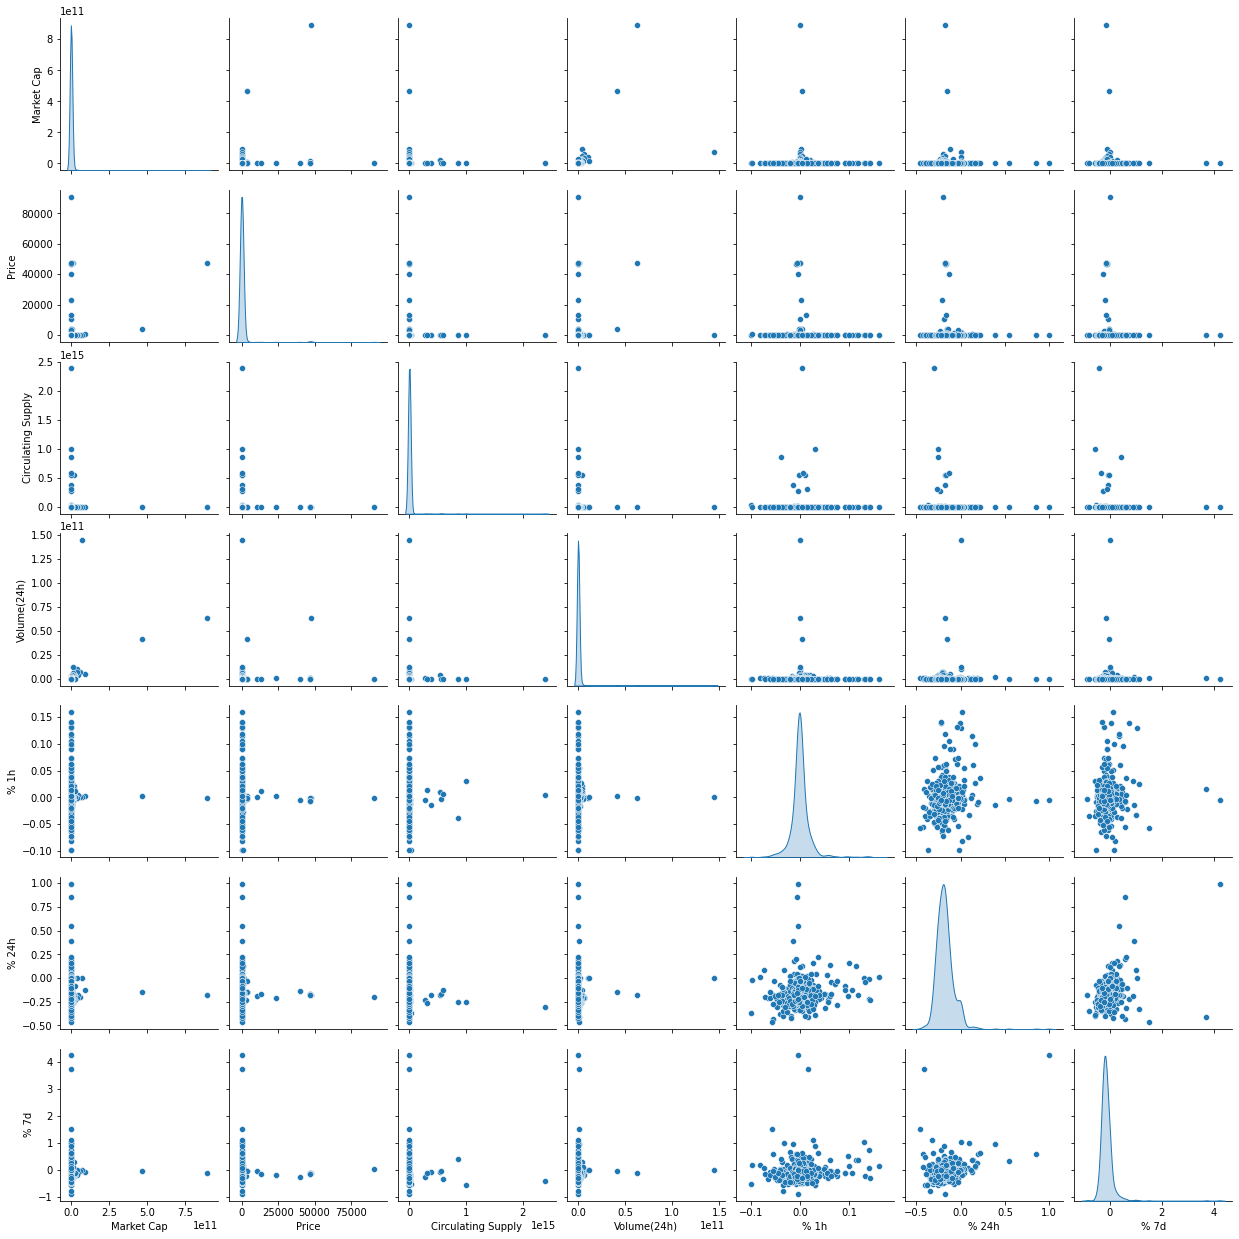

In [15]:
sns.pairplot(df, diag_kind='kde')

<AxesSubplot:ylabel='cooks_d'>

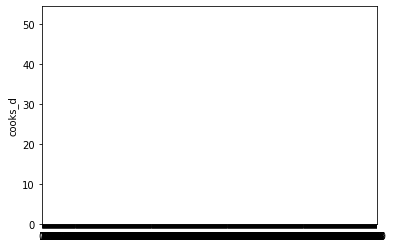

In [33]:
#Test - Checking Cook'D for Outliers without log

influence = crypto_model_non_log.get_influence()
influence_frame = influence.summary_frame().reset_index()

sns.barplot(y = 'cooks_d',
            x = influence_frame.index,
           data = influence_frame)

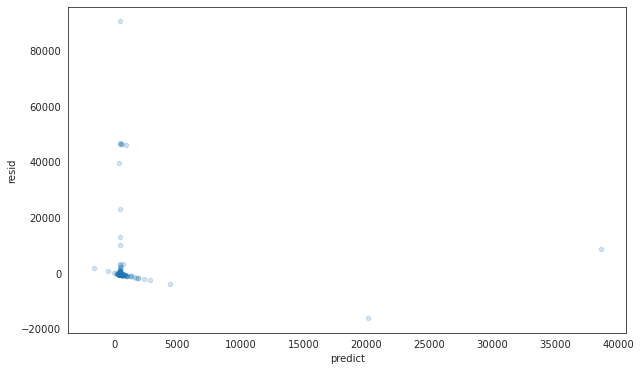

In [39]:
#Test - Non-normality without log
df['predict']= crypto_model_non_log.predict(x)
df['resid'] = df['Price']-df['predict']
with sns.axes_style('white'):
    plot=df.plot(kind='scatter',
                    x='predict', y = 'resid', alpha = 0.2, figsize=(10,6))

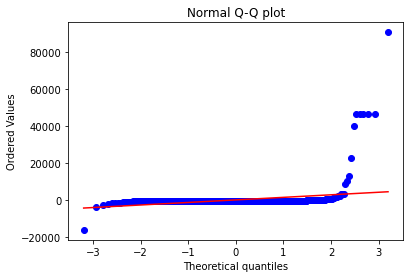

In [40]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df['resid'], dist = 'norm', plot = plt)
plt.title('Normal Q-Q plot')
plt.show()

In [ ]:
#Taking Log transformation on the first four variables, drop Market Cap

In [34]:
df_log = df.apply(lambda x: np.log(x) if x.name in ["Price", "Market Cap", 'Circulating Supply', 'Volume(24h)'] else x)

df_log = df_log.drop('Market Cap', axis = 1)
df_log

,Symbol,Price,Circulating Supply,Volume(24h),% 1h,% 24h,% 7d
0,BTC,10.763328,16.754196,24.863070,-0.0014,-0.1773,-0.1428
1,ETH,8.281220,18.591284,24.447914,0.0027,-0.1501,-0.0499
2,BNB,6.306440,18.932313,22.244232,0.0021,-0.1238,-0.1013
3,USDT,0.000000,25.029459,25.694468,-0.0001,-0.0009,-0.0007
4,SOL,5.259369,19.537922,22.597182,0.0001,-0.1955,-0.0336
...,...,...,...,...,...,...,...
995,PING,-5.258136,21.717800,13.220531,-0.0063,-0.1630,-0.2510
996,BIN,-4.042132,20.500122,14.489607,0.0132,-0.2527,-0.2191
997,FEAR,0.760806,15.692248,16.413237,-0.0054,-0.2222,0.0025
998,AGRS,-0.252444,16.705882,8.667852,0.0371,-0.0830,0.0620


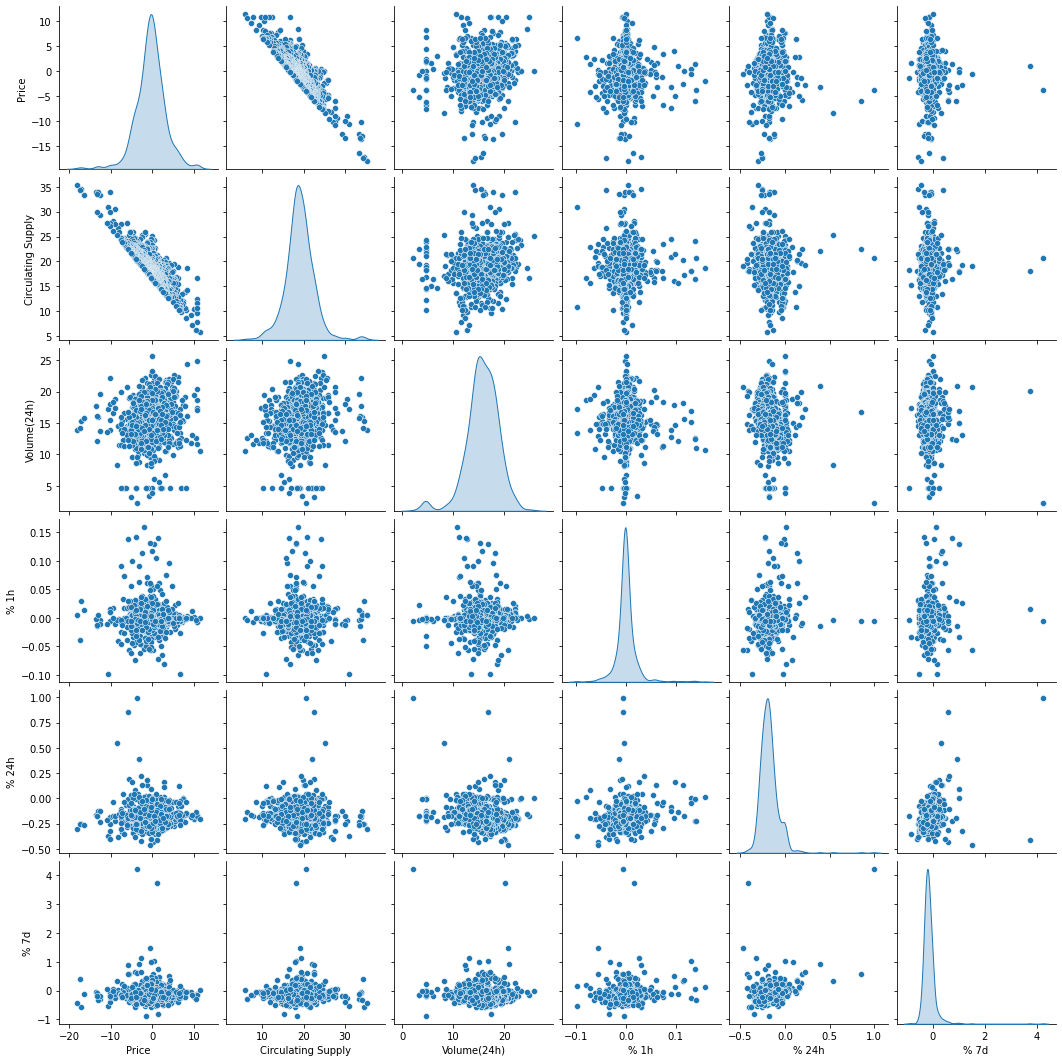

In [35]:
sns.pairplot(df_log, diag_kind='kde')

In [36]:
#Fitting with log in the features and target
x = df_log.drop(columns = ['Price', 'Symbol'])
x = sm.add_constant(x)
y = df_log['Price']

model = sm.OLS(y, x, data = df_log)
crypto_model = model.fit()
crypto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1308.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:16:55   Log-Likelihood:                -1675.3
No. Observations:                1000   AIC:                             3363.
Df Residuals:                     994   BIC:                             3392.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.3643      0.282     43.814      0.000      11.811      12.918
Circulating Supply    -0.9560      0.012    -79.772      0.000      -0.980      -0.932
Volume(24h)            0.3516      0.014     25.526      0.000       0.325       0.379
% 1h                  -0.3919      1.901     -0.206      0.837      -4.123       3.339
% 24h                  0.8437      0.449      1.881      0.060      -0.037       1.724
% 7d                   0.0701      0.169      0.414      0.679      -0.262       0.402
==============================================================================
Omnibus:                      138.999   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.316
Skew:                           0.908   Prob(JB):                     2.64e-50
Kurtosis:                       4.477   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='cooks_d'>

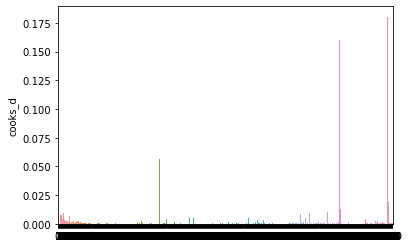

In [13]:
#Test - Checking Cook'D for Outliers

influence = crypto_model.get_influence()
influence_frame = influence.summary_frame().reset_index()

sns.barplot(y = 'cooks_d',
            x = influence_frame.index,
           data = influence_frame)

In [14]:
max_index = influence_frame['cooks_d'].idxmax()
df_log.iloc[max_index]
#outliers seems to be okay

Symbol                      TOP
Price                 -5.944963
Circulating Supply    22.430269
Volume(24h)            16.76292
% 1h                    -0.0062
% 24h                     0.857
% 7d                     0.5736
Name: 984, dtype: object

In [15]:
#Test - check vif for collinarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df_log.drop(columns = ['Price', 'Symbol'])
x = sm.add_constant(x)
y = df_log['Price']


model = sm.OLS(y, x, data = df_log)
crypto_model = model.fit()
crypto_model.summary()

vif = pd.DataFrame()
vif['variables'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

#collinarity is okay

,variables,vif
0,const,47.408638
1,Circulating Supply,1.034916
2,Volume(24h),1.120251
3,% 1h,1.022078
4,% 24h,1.357747
5,% 7d,1.252199


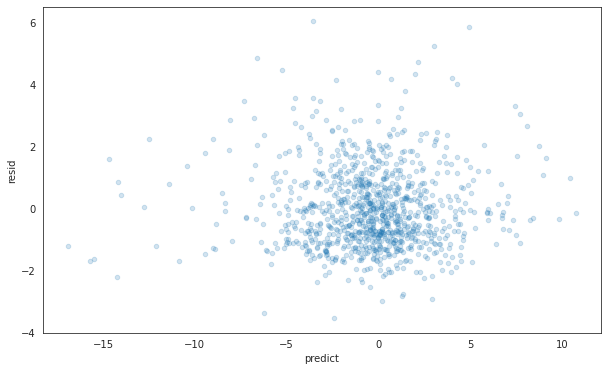

In [38]:
#Test - Non-normality
df_log['predict']= crypto_model.predict(x)
df_log['resid'] = df_log['Price']-df_log['predict']
with sns.axes_style('white'):
    plot=df_log.plot(kind='scatter',
                    x='predict', y = 'resid', alpha = 0.2, figsize=(10,6))

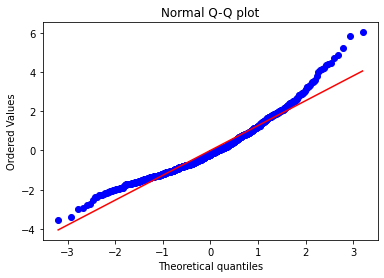

In [39]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df_log['resid'], dist = 'norm', plot = plt)
plt.title('Normal Q-Q plot')
plt.show()

In [30]:
#Question for Julia, I already logged 4 features and the target, what else can I do to improve normality in the QQ plot. It looks okay(?)

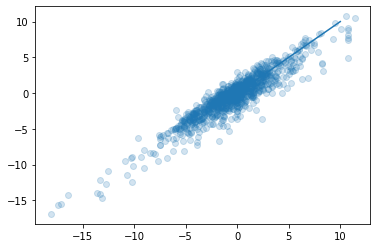

In [40]:
#plotting against residuals in baseline model

df_log['predict']= crypto_model.predict(x)
df_log['resid'] = df_log['Price']-df_log['predict']
plt.scatter(df_log['Price'], df_log['predict'], alpha=0.2)
plt.plot([0, 10], [0, 10])

In [47]:
df_log.drop('predict', axis=1, inplace=True)
df_log.drop('resid', axis=1, inplace=True)
df_log

,Symbol,Price,Circulating Supply,Volume(24h),% 1h,% 24h,% 7d
0,BTC,10.763328,16.754196,24.863070,-0.0014,-0.1773,-0.1428
1,ETH,8.281220,18.591284,24.447914,0.0027,-0.1501,-0.0499
2,BNB,6.306440,18.932313,22.244232,0.0021,-0.1238,-0.1013
3,USDT,0.000000,25.029459,25.694468,-0.0001,-0.0009,-0.0007
4,SOL,5.259369,19.537922,22.597182,0.0001,-0.1955,-0.0336
...,...,...,...,...,...,...,...
995,PING,-5.258136,21.717800,13.220531,-0.0063,-0.1630,-0.2510
996,BIN,-4.042132,20.500122,14.489607,0.0132,-0.2527,-0.2191
997,FEAR,0.760806,15.692248,16.413237,-0.0054,-0.2222,0.0025
998,AGRS,-0.252444,16.705882,8.667852,0.0371,-0.0830,0.0620


In [20]:
#RMSE
residuals = crypto_model.predict(x) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)
#MAE
mae = sum(abs(crypto_model.predict(x) - y)/len(y))
print(mae)

1.2921907304459754
1.0031365557573515


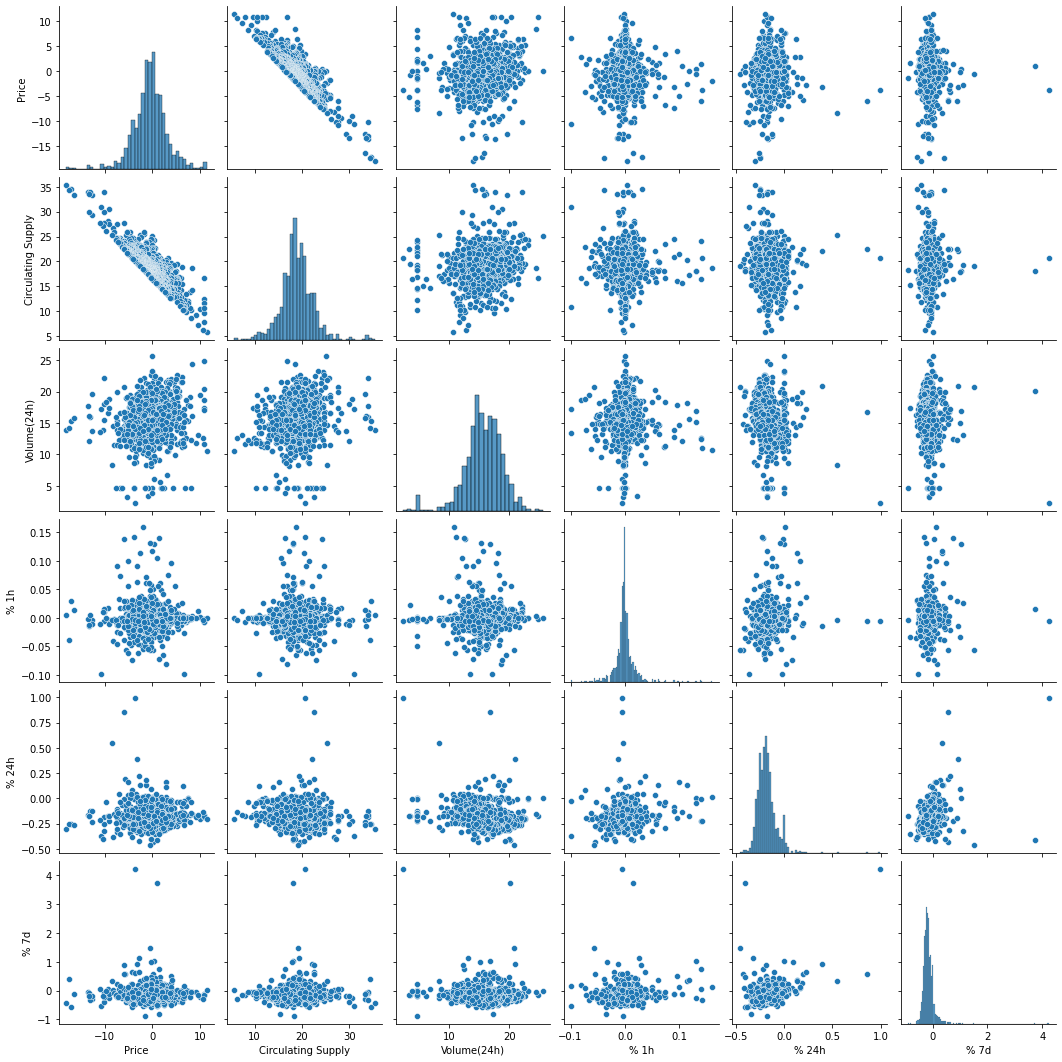

In [21]:
sns.pairplot(df_log)

In [41]:
#Cross Valditation Trial

In [42]:
#BaseLine

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_log.drop(columns=['Price', 'Symbol'])
y = df_log['Price']

X, X_test, y, y_test = train_test_split(X, y, 
                                       test_size=.3,     
                                       random_state=42)

model = LinearRegression()
lr = model.fit(X,y)

r_squared_train = lr.score(X,y)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_test)

#No OverFitting, No Need to do Regularization

0.8681743842206635
0.8660971824699454


In [44]:
#Fitting with log in the features and target
x = df_log.drop(columns = ['Price', 'Symbol', "% 1h"])
x = sm.add_constant(x)
y = df_log['Price']

model = sm.OLS(y, x, data = df_log)
crypto_model = model.fit()
crypto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1636.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:17:43   Log-Likelihood:                -1675.3
No. Observations:                1000   AIC:                             3361.
Df Residuals:                     995   BIC:                             3385.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.3638      0.282     43.835      0.000      11.810      12.917
Circulating Supply    -0.9560      0.012    -79.811      0.000      -0.980      -0.933
Volume(24h)            0.3515      0.014     25.543      0.000       0.325       0.379
% 24h                  0.8337      0.446      1.870      0.062      -0.041       1.708
% 7d                   0.0686      0.169      0.406      0.685      -0.263       0.400
==============================================================================
Omnibus:                      139.044   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.275
Skew:                           0.909   Prob(JB):                     2.70e-50
Kurtosis:                       4.475   Cond. No.                         275.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Residuals + Predict
df_log['predict']= crypto_model.predict(x)
df_log['resid'] = df_log['Price']-df_log['predict']
df_log

,Symbol,Price,Circulating Supply,Volume(24h),% 1h,% 24h,% 7d,predict,resid
0,BTC,10.763328,16.754196,24.863070,-0.0014,-0.1773,-0.1428,4.928498,5.834830
1,ETH,8.281220,18.591284,24.447914,0.0027,-0.1501,-0.0499,3.055332,5.225888
2,BNB,6.306440,18.932313,22.244232,0.0021,-0.1238,-0.1013,1.973092,4.333347
3,USDT,0.000000,25.029459,25.694468,-0.0001,-0.0009,-0.0007,-2.533718,2.533718
4,SOL,5.259369,19.537922,22.597182,0.0001,-0.1955,-0.0336,1.463052,3.796317
...,...,...,...,...,...,...,...,...,...
995,PING,-5.258136,21.717800,13.220531,-0.0063,-0.1630,-0.2510,-3.904731,-1.353405
996,BIN,-4.042132,20.500122,14.489607,0.0132,-0.2527,-0.2191,-2.367118,-1.675014
997,FEAR,0.760806,15.692248,16.413237,-0.0054,-0.2222,0.0025,2.946080,-2.185274
998,AGRS,-0.252444,16.705882,8.667852,0.0371,-0.0830,0.0620,-0.625403,0.372960


In [26]:
df_log.sort_values(['resid'], ascending=True).head(5)
#Evaluate the biggest negative Residuals

,Symbol,Price,Circulating Supply,Volume(24h),% 1h,% 24h,% 7d,predict,resid
984,TOP,-5.944963,22.430269,16.762920,-0.0062,0.8570,0.5736,-2.433734,-3.511229
970,BIDR,-9.609625,26.142541,18.276980,-0.0008,-0.0326,-0.0280,-6.233452,-3.376173
987,QLC,-2.809087,19.296149,17.200668,0.0366,0.2228,0.6290,0.191460,-3.000547
746,USDK,0.000000,17.168920,19.793246,-0.0002,0.0014,-0.0014,2.908613,-2.908613
918,DG,-1.514582,18.198845,18.033256,0.0007,-0.0175,-0.0630,1.285355,-2.799938


In [438]:
#Dropping the %1hr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_log.drop(columns=['Price', 'Symbol', "% 1h"])
y = df_log['Price']

X, X_test, y, y_test = train_test_split(X, y, 
                                       test_size=.3,     
                                       random_state=42)

model = LinearRegression()
lr = model.fit(X,y)

r_squared_train = lr.score(X,y)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_test)

0.8681547008846496
0.8661242709410406


In [448]:
#try with validation
X = df_log.drop(columns=['Price', 'Symbol'])
y = df_log['Price']

X, X_test, y, y_test = train_test_split(X, y,
                                       test_size = 0.2,
                                       random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size=0.25,
                                                 random_state=42) 

model = LinearRegression()
lr = model.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_val = lr.score(X_val, y_val)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_val)
print(r_squared_test)

0.8647089121512401
0.8504400586557156
0.8951612460349652


In [ ]:
#Drop % 1hr 

In [107]:
df_log.drop('% 1h', axis=1)

,Symbol,Market Cap,Price,Volume(24h),% 24h,% 7d
0,BTC,27.517523,10.763328,24.863070,-0.1773,-0.1428
1,ETH,26.872504,8.281220,24.447914,-0.1501,-0.0499
2,BNB,25.238749,6.306440,22.244232,-0.1238,-0.1013
3,USDT,25.029651,0.000000,25.694468,-0.0009,-0.0007
4,SOL,24.797310,5.259369,22.597182,-0.1955,-0.0336
...,...,...,...,...,...,...
995,PING,16.459710,-5.258136,13.220531,-0.1630,-0.2510
996,BIN,16.457751,-4.042132,14.489607,-0.2527,-0.2191
997,FEAR,16.453897,0.760806,16.413237,-0.2222,0.0025
998,AGRS,16.453446,-0.252444,8.667852,-0.0830,0.0620


In [446]:
#run model with % 1hr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_log.drop(columns=['Price', 'Symbol'])
y = df_log['Price']

X, X_test, y, y_test = train_test_split(X, y, 
                                       test_size=.3,     
                                       random_state=42)

model = LinearRegression()
lr = model.fit(X,y)

r_squared_train = lr.score(X,y)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_test)

0.8681743842206635
0.8660971824699454


In [447]:
#try with validation post deleting % 1hr
X = df_log.drop(columns=['Price', 'Symbol'])
y = df_log['Price']

X, X_test, y, y_test = train_test_split(X, y,
                                       test_size = 0.2,
                                       random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size=0.25,
                                                 random_state=42) 

model = LinearRegression()
lr = model.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_val = lr.score(X_val, y_val)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_val)
print(r_squared_test)

#'did not change the model'

0.8647089121512401
0.8504400586557156
0.8951612460349652


In [449]:
#5-fold cross validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

X = df_log.drop(columns=['Price', 'Symbol'])
y = df_log['Price']

X, X_test, y, y_test = train_test_split(X, y,
                                           test_size=.2,
                                           random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
#collect the validation results for both models
cv_lm_r2s, cv_lm_scale_r2s =[], []
for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    #simple Linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

mean_r2 = np.mean(cv_lm_r2s)
std_r2 = np.std(cv_lm_r2s)

Simple regression scores:  [0.8349285449261727, 0.8742373891699206, 0.8487516589010144, 0.8588492646212849, 0.8693544075081348]
Simple mean cv r^2: 0.857 +- 0.014


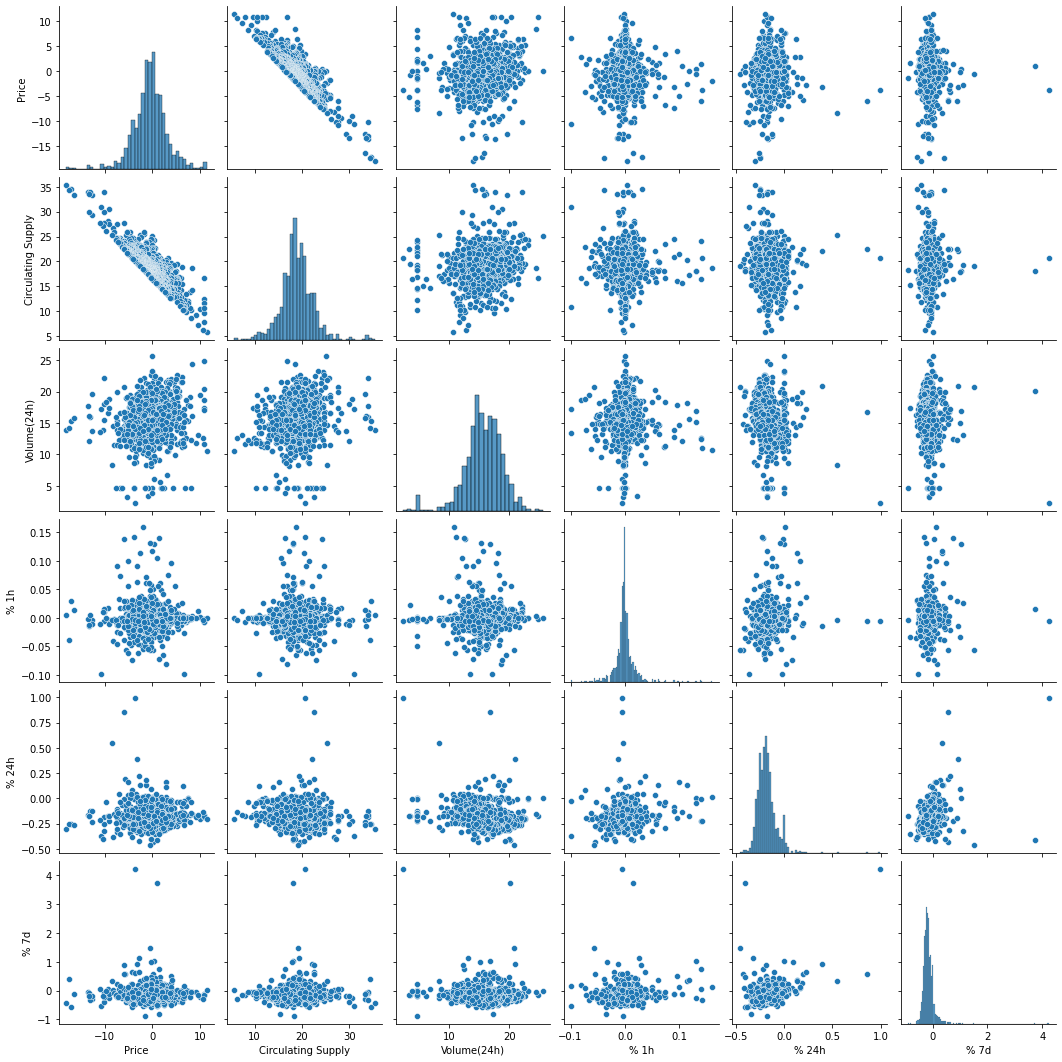

In [435]:
sns.pairplot(df_log)

In [450]:
list(zip(X_train.columns, model.coef_))

[('Circulating Supply', -0.9685206037233793),
 ('Volume(24h)', 0.34252141211336223),
 ('% 1h', -1.269758438688213),
 ('% 24h', 0.8891684974306792),
 ('% 7d', 0.028666613603556147)]

In [ ]:

#RESIDUAL and PREDICT

In [ ]:
#Polynomials

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
X = df_log.drop(columns=['Price', 'Symbol'])
y = df_log['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

#Fit a model using polynomial features
#lr_poly = LinearRegression()
#lr_poly.fit(X_train_poly,y_train)
#lr_poly.score(X_train_poly,y_train)

model = sm.OLS(y_train, X_train_poly, data = df_log)
crypto_model_poly = model.fit()
crypto_model_poly.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     438.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:18:46   Log-Likelihood:                -1151.8
No. Observations:                 800   AIC:                             2346.
Df Residuals:                     779   BIC:                             2444.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3440      1.037     21.544      0.000      20.308      24.380
x1            -1.0976      0.063    -17.451      0.000      -1.221      -0.974
x2            -0.9016      0.078    -11.556      0.000      -1.055      -0.748
x3             6.5366     13.476      0.485      0.628     -19.916      32.989
x4            -6.4197      3.266     -1.965      0.050     -12.831      -0.008
x5             5.3955      1.561      3.457      0.001       2.332       8.459
x6             0.0019      0.001      1.337      0.182      -0.001       0.005
x7             0.0058      0.003      1.727      0.085      -0.001       0.012
x8            -0.7867      0.475     -1.657      0.098      -1.719       0.145
x9             0.3383      0.128      2.635      0.009       0.086       0.590
x10           -0.1036      0.062     -1.662      0.097      -0.226       0.019
x11            0.0389      0.002     19.441      0.000       0.035       0.043
x12            0.3979      0.665      0.598      0.550      -0.908       1.703
x13           -0.0080      0.123     -0.065      0.949      -0.250       0.234
x14           -0.2486      0.067     -3.737      0.000      -0.379      -0.118
x15           -0.5006     26.771     -0.019      0.985     -53.052      52.050
x16          -15.2235     14.526     -1.048      0.295     -43.738      13.291
x17           -4.8201      5.341     -0.902      0.367     -15.305       5.664
x18           -5.2373      1.315     -3.983      0.000      -7.819      -2.656
x19           -2.4417      0.957     -2.551      0.011      -4.321      -0.563
x20            0.0258      0.104      0.249      0.804      -0.178       0.230
==============================================================================
Omnibus:                       61.159   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.343
Skew:                           0.558   Prob(JB):                     7.28e-22
Kurtosis:                       4.295   Cond. No.                     4.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_log.drop(columns=['Price', 'Symbol'])
y = df_log['Price']

X, X_test, y, y_test = train_test_split(X, y, 
                                       test_size=.3,     
                                       random_state=42)

model = LinearRegression()
lr = model.fit(X,y)

r_squared_train = lr.score(X,y)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_test)

0.8681743842206635
0.8660971824699454


In [52]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x3^2',
 'x3 x4',
 'x4^2']

In [53]:
poly

PolynomialFeatures()

In [322]:
#Interaction Variable

,Symbol,Market Cap,Price,Volume(24h),% 1h,% 24h,% 7d,Dummy1,MarketCap*Volume
0,BTC,27.517523,10.763328,24.863070,-0.0014,-0.1773,-0.1428,1,684.170098
1,ETH,26.872504,8.281220,24.447914,0.0027,-0.1501,-0.0499,1,656.976665
2,BNB,25.238749,6.306440,22.244232,0.0021,-0.1238,-0.1013,1,561.416598
3,USDT,25.029651,0.000000,25.694468,-0.0001,-0.0009,-0.0007,1,643.123564
4,SOL,24.797310,5.259369,22.597182,0.0001,-0.1955,-0.0336,1,560.349326
...,...,...,...,...,...,...,...,...,...
995,PING,16.459710,-5.258136,13.220531,-0.0063,-0.1630,-0.2510,0,217.606112
996,BIN,16.457751,-4.042132,14.489607,0.0132,-0.2527,-0.2191,0,238.466346
997,FEAR,16.453897,0.760806,16.413237,-0.0054,-0.2222,0.0025,0,270.061707
998,AGRS,16.453446,-0.252444,8.667852,0.0371,-0.0830,0.0620,0,142.616032


In [371]:
#df_poly = df_log.copy()
df_poly['MarketCap*MarketCap'] = df_poly['Market Cap'] * df_poly['Market Cap']
df_poly['MarketCap*Volume'] = df_poly['Market Cap'] * df_poly['Volume(24h)']
df_poly['MarketCap*1hr'] = df_poly['Market Cap'] * df_poly['% 1h']
df_poly['MarketCap*24h'] = df_poly['Market Cap'] * df_poly['% 24h']
df_poly['MarketCap*%7d'] = df_poly['Market Cap'] * df_poly['% 7d']

#df_poly['Volume(24h)*Volume(24h)'] = df_poly['Volume(24h)'] * df_poly['Volume(24h)']
#df_poly['Volume(24h)*%1h'] = df_poly['Volume(24h)'] * df_poly['% 1h']
#df_poly['Volume(24h)*%24h'] = df_poly['Volume(24h)'] * df_poly['% 24h']
#df_poly['Volume(24h)*%7d'] = df_poly['Volume(24h)'] * df_poly['% 7d']

df_poly

,Symbol,Market Cap,Price,Volume(24h),% 1h,% 24h,% 7d,Dummy1,MarketCap*MarketCap,MarketCap*Volume,MarketCap*1hr,MarketCap*24h,MarketCap*%7d
0,BTC,27.517523,10.763328,24.863070,-0.0014,-0.1773,-0.1428,1,757.214089,684.170098,-0.038525,-4.878857,-3.929502
1,ETH,26.872504,8.281220,24.447914,0.0027,-0.1501,-0.0499,1,722.131479,656.976665,0.072556,-4.033563,-1.340938
2,BNB,25.238749,6.306440,22.244232,0.0021,-0.1238,-0.1013,1,636.994458,561.416598,0.053001,-3.124557,-2.556685
3,USDT,25.029651,0.000000,25.694468,-0.0001,-0.0009,-0.0007,1,626.483440,643.123564,-0.002503,-0.022527,-0.017521
4,SOL,24.797310,5.259369,22.597182,0.0001,-0.1955,-0.0336,1,614.906561,560.349326,0.002480,-4.847874,-0.833190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PING,16.459710,-5.258136,13.220531,-0.0063,-0.1630,-0.2510,0,270.922056,217.606112,-0.103696,-2.682933,-4.131388
996,BIN,16.457751,-4.042132,14.489607,0.0132,-0.2527,-0.2191,0,270.857557,238.466346,0.217242,-4.158874,-3.605893
997,FEAR,16.453897,0.760806,16.413237,-0.0054,-0.2222,0.0025,0,270.730727,270.061707,-0.088851,-3.656056,0.041135
998,AGRS,16.453446,-0.252444,8.667852,0.0371,-0.0830,0.0620,0,270.715870,142.616032,0.610423,-1.365636,1.020114
